In [58]:
# importação de bibliotecas

import pandas as pd                                             # importação de biblioteca para manipulação de dados
import numpy as np                                              # importação de biblioteca para manipulação de numeros
import matplotlib.pyplot as plt                                 # importação de biblioteca para visualização de gráficos
import seaborn as sns                                           # importação de biblioteca para visualização de dados graficamente
import plotly.express as px                                     # importação de biblioteca para visualização de dados graficamente
from sklearn.linear_model import LinearRegression               # importação de biblioteca sklearn para aplicação de regressão linear
from yellowbrick.regressor import ResidualsPlot                 # importação de biblioteca yellowbrick para visualização de dados graficamente
from sklearn.model_selection import train_test_split            # importação de biblioteca sklearn para divisão de dados em treino e teste
import plotly.graph_objects as go                               # importação de biblioteca plotly para visualização de dados graficamente

In [32]:
# carregamento da base de dados preço de casas

base_casas = pd.read_csv('./data/house_prices.csv')

In [33]:
# visualização dos registros

base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [34]:
# dicionário dados

In [35]:
# informações gerais da base de dados

base_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [36]:
# descrição dos dados

# id                - identificação da casa                             / variável        
# date              - data de anúncio da casa                           / variável 
# price             - preço da casa                                     / variável
# bedrooms          - quantidade de quartos                             / variável
# bathrooms         - quantidade de banheiros                           / variável
# sqft_living       - área de casa                                      / variável
# sqft_lot          - área do lote                                      / variável
# floors            - quantidade de pisos                               / variável
# waterfront        - localização do mar                                / variável
# view              - localização da vista                              / variável
# condition         - condição da casa                                  / variável
# grade             - condição do lote                                  / variável
# sqft_above        - área acima do lote                                / variável
# sqft_basement     - área do fundo                                     / variável
# yr_built          - ano de construção                                 / variável
# yr_renovated      - ano de renovação                                  / variável
# zipcode           - código do endereço                                / variável
# latitude          - latitude do endereço                              / variável
# longitude         - longitude do endereço                             / variável
# sqft_living15     - área de casa no ano de 2015                       / variável
# sqft_lot15        - área do lote no ano de 2015                       / variável




# age               - idade                                             / variavel numérica e discreta
# workclass         - classe de trabalho                                / variavel categórica e discreta


In [37]:
# exploração da base de dados

In [38]:
# visualização dos dados estatísticos das variaveis numéricas da base de dados

base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [39]:
# exploração em valores nulos

nulos_base = pd.DataFrame(base_casas.isnull().sum())
nulos_base.columns = ['nulos']
nulos_base

,nulos
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [40]:
# correlação entre as variaveis

base_casas.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


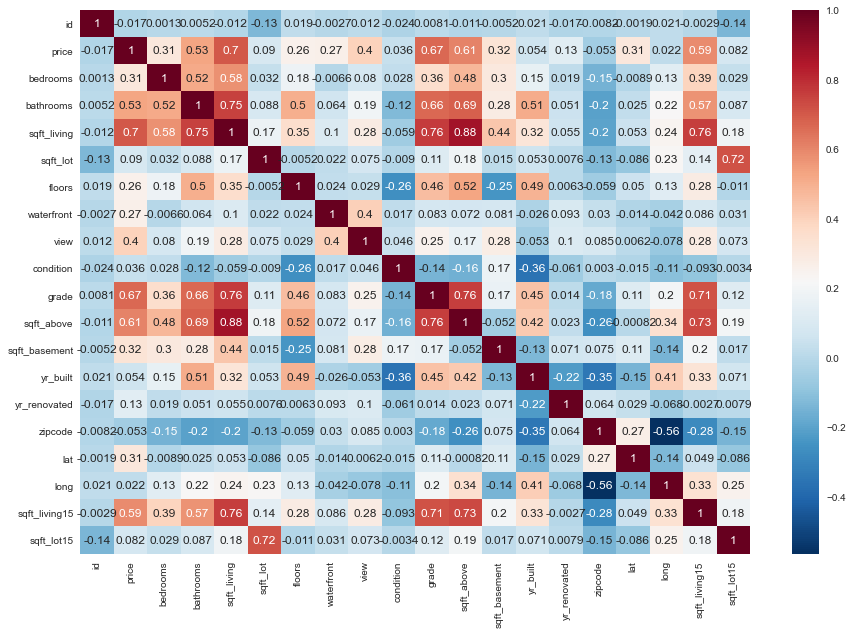

In [41]:
# correlação entre as variaveis usando o heatmap do seaborn

plt.figure(figsize=(15, 10))
fig = sns.heatmap(base_casas.corr(), annot=True, cmap='RdBu_r')
plt.show()

In [42]:
# selecionando as variaveis para o modelo
# tamanho da casa - sqft_living

X_base_casas = base_casas.iloc[ :, 5:6].values
X_base_casas

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [43]:
# seleção da variavel para o modelo
# preço da casa - price [target]

y_base_casas = base_casas.iloc[ :, 2].values
y_base_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [44]:
# divisão da base de dados em treino e teste

X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_base_casas, y_base_casas, test_size=0.3, random_state=0)

In [45]:
# visualização dos tamanhos das amostras

X_casas_treinamento.shape, y_casas_treinamento.shape, X_casas_teste.shape, y_casas_teste.shape

((15129, 1), (15129,), (6484, 1), (6484,))

In [46]:
# crianção do modelo de regressão linear simples

regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [47]:
# visualização dos parametros do modelo
# b0 e b1

regressor_simples_casas.intercept_, regressor_simples_casas.coef_

(-37893.598501067376, array([278.32860644]))

In [48]:
# teste do modelo com a base de dados de teste

regressor_simples_casas.predict(X_casas_teste)

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [49]:
# visualização dos resultados do modelo na base de dados de treinamento

regressor_simples_casas.score(X_casas_treinamento, y_casas_treinamento)

0.49453356717789776

In [50]:
# visualização dos resultados do modelo na base de dados de teste

regressor_simples_casas.score(X_casas_teste, y_casas_teste)

0.48889929019453016

In [51]:
# previsões

previsoes_casas = regressor_simples_casas.predict(X_casas_treinamento)

In [57]:
# visualização dos resultados do modelo graficamente

grafico = px.scatter( x = X_casas_treinamento.ravel(), y = previsoes_casas)
grafico.show()

In [62]:
# visualização dos resultados do modelo graficamente

grafico1 = px.scatter( x = X_casas_treinamento.ravel(), y = y_casas_treinamento)
grafico2 = px.line( x = X_casas_treinamento.ravel(), y = previsoes_casas)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3